# Training a DL model using CICIoT2023



In [4]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
DATASET_DIRECTORY = 'C:/Users/EDWIN/Downloads/CICIoT2023'

### Importing Dataset

In [6]:
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
dfs=[]
#Dropping NA values
for file in tqdm(df_sets):
    file_path=os.path.join(DATASET_DIRECTORY,file)
    df=pd.read_csv(file_path)
    df.dropna()
    dfs.append(df)
    
print(dfs[0])


100%|██████████| 169/169 [03:21<00:00,  1.19s/it]


        flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0            0.000000          54.00           6.00     64.00     0.329807   
1            0.000000          57.04           6.33     64.00     4.290556   
2            0.000000           0.00           1.00     64.00    33.396799   
3            0.328175       76175.00          17.00     64.00  4642.133010   
4            0.117320         101.73           6.11     65.91     6.202211   
...               ...            ...            ...       ...          ...   
238682       0.000000          54.00           6.00     64.00     3.049186   
238683       0.000000          54.00           6.00     64.00   183.433732   
238684       0.000785          56.29           6.11     64.00   306.952216   
238685       0.000901          72.09           6.11     64.64   158.475986   
238686       0.000000           0.00           1.00     64.00     1.291274   

              Srate  Drate  fin_flag_number  syn_flag_number  r

In [14]:
# correlation check

for i in range(5):
    file_path=os.path.join(DATASET_DIRECTORY,df_sets[i])
    df=pd.read_csv(file_path)
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corrm=numeric_df.corr()
    print(corrm)

                 flow_duration  Header_Length  Protocol Type  Duration  \
flow_duration         1.000000       0.009258       0.003800  0.029033   
Header_Length         0.009258       1.000000       0.049436  0.314523   
Protocol Type         0.003800       0.049436       1.000000 -0.011948   
Duration              0.029033       0.314523      -0.011948  1.000000   
Rate                 -0.001574      -0.011613       0.016323 -0.009623   
Srate                -0.001574      -0.011613       0.016323 -0.009623   
Drate                -0.000052      -0.000510      -0.001046 -0.000489   
fin_flag_number      -0.005481      -0.051158      -0.105365 -0.049311   
syn_flag_number      -0.007190      -0.085220      -0.174258 -0.077542   
rst_flag_number      -0.005492      -0.052415      -0.108040 -0.038875   
psh_flag_number      -0.004820      -0.030637      -0.106728 -0.017963   
ack_flag_number       0.011897       0.181774      -0.120354  0.299757   
ece_flag_number            NaN        

In [5]:
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight', 
]
y_column = 'label'

In [ ]:
training_sets = df_sets[:int(len(df_sets)*.8)]
test_sets = df_sets[int(len(df_sets)*.8):]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(dfs[0].drop(labels=['label'], axis=1),dfs[0]['label'],test_size=0.3,random_state=0)

from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([6.33418621e-01, 1.32358022e+00, 1.16225692e+00, 2.05510912e-01,
       6.26822430e-01, 6.25782191e-01, 0.00000000e+00, 2.92122541e-01,
       4.96918186e-01, 2.81853187e-01, 2.84708557e-01, 3.24770949e-01,
       0.00000000e+00, 1.08547393e-04, 3.32385957e-01, 6.44998207e-01,
       3.42857236e-01, 4.59161771e-01, 5.07548609e-01, 3.22720819e-02,
       7.02647483e-02, 4.25859213e-03, 1.11711264e-03, 1.26370883e-03,
       2.71369340e-03, 3.64789396e-03, 6.56326308e-01, 4.96130656e-01,
       8.80989940e-04, 1.51804408e-03, 4.43287846e-01, 5.10828453e-03,
       6.45023040e-03, 1.30604184e+00, 1.29820785e+00, 1.26973589e+00,
       1.31444291e+00, 3.77315193e-01, 1.33544043e+00, 2.60202063e+00,
       1.77567972e-01, 1.31572496e+00, 3.76931995e-01, 3.76884410e-01,
       2.96044816e-01, 1.76448519e-01])

<Axes: >

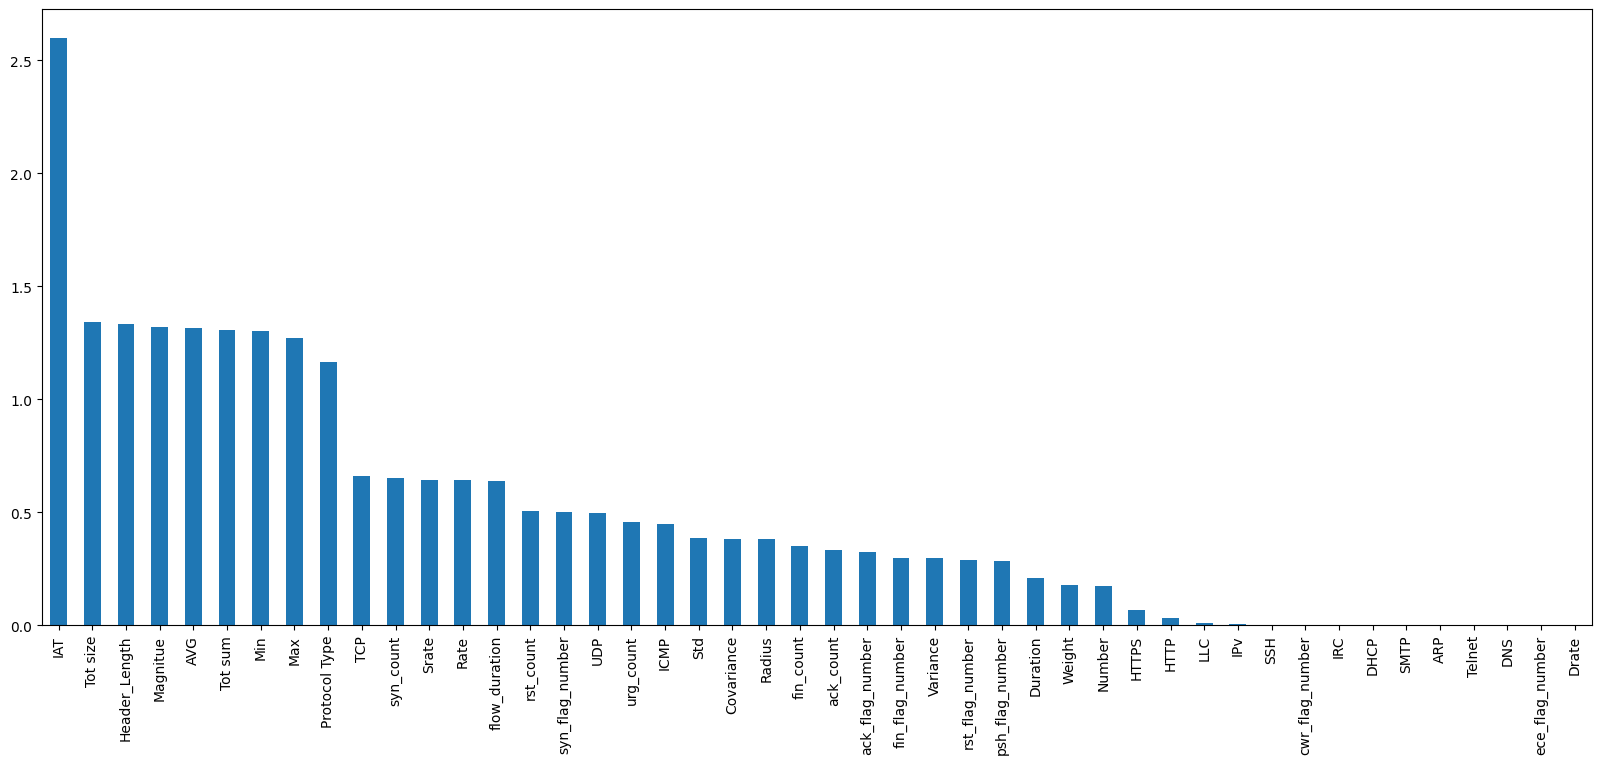

In [21]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [24]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(X_train, y_train)
features=X_train.columns[sel_five_cols.get_support()].tolist()



In [36]:
df=dfs[0]

features.append('label')

from sklearn.preprocessing import LabelEncoder

# Example of encoding categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

features


['flow_duration',
 'Header_Length',
 'Protocol Type',
 'Rate',
 'Srate',
 'syn_count',
 'rst_count',
 'TCP',
 'Tot sum',
 'Min',
 'Max',
 'AVG',
 'Tot size',
 'IAT',
 'Magnitue',
 'label']

In [48]:
df.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
238682,0.000000,54.00,6.00,64.00,3.049186,3.049186,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334449e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
238683,0.000000,54.00,6.00,64.00,183.433732,183.433732,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331392e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,8
238684,0.000785,56.29,6.11,64.00,306.952216,306.952216,0.0,0.0,1.0,0.0,...,0.140764,54.21,8.308883e+07,9.5,10.395538,0.200659,0.671167,0.03,141.55,10
238685,0.000901,72.09,6.11,64.64,158.475986,158.475986,0.0,0.0,0.0,0.0,...,2.450404,55.48,8.333177e+07,9.5,10.456522,3.475801,55.994224,0.17,141.55,8
238686,0.000000,0.00,1.00,64.00,1.291274,1.291274,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312453e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6


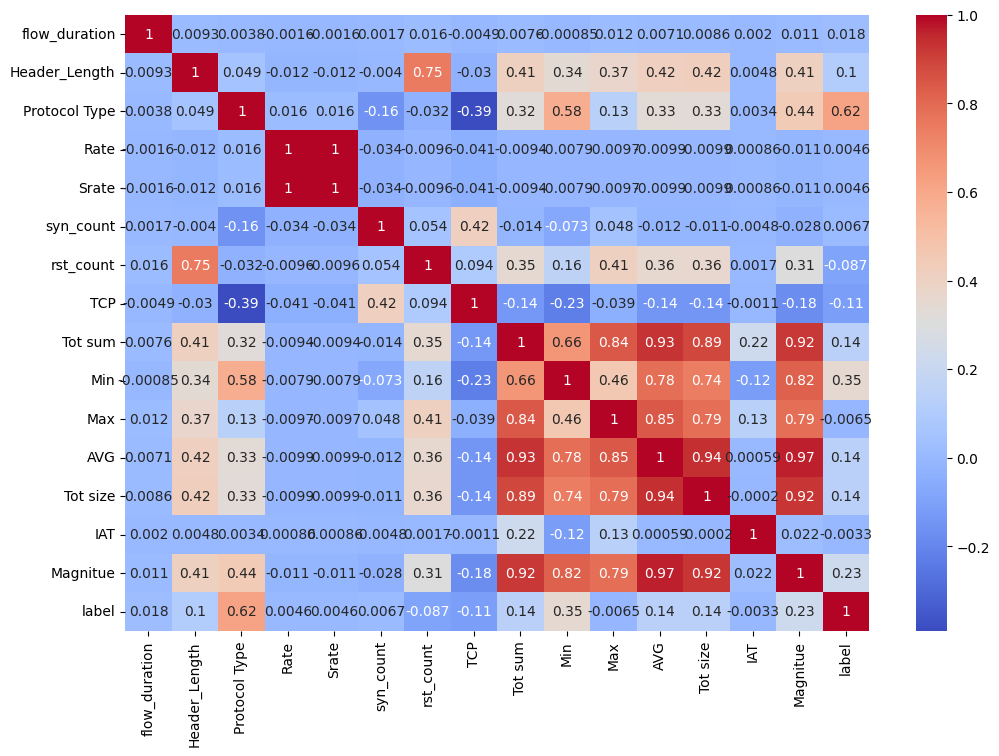

Selected features based on correlation: Index(['Header_Length', 'Protocol Type', 'TCP', 'Tot sum', 'Min', 'AVG',
       'Tot size', 'Magnitue'],
      dtype='object')


In [38]:

df_top_features = df[features]
corr_matrix = df_top_features.corr()
corr_matrix

import seaborn as sns
import matplotlib.pyplot as plt


# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Select features with high correlation to the target
target_corr = corr_matrix['label'].drop('label').abs()
selected_features = target_corr[target_corr > 0.1].index  # Threshold can be adjusted
print("Selected features based on correlation:", selected_features)


In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop(columns=['label'])  # Features
y = df['label']

X_selected = X

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize scalers
scaler = StandardScaler()  # or MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data based on the training data scaling
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.69      0.93      0.79      1118
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.95      0.98      0.97       311
           5       0.56      0.63      0.59        38
           6       1.00      1.00      1.00      7494
           7       1.00      0.97      0.98       494
           8       1.00      1.00      1.00      4175
           9       1.00      1.00      1.00      4072
          10       0.66      0.96      0.78      4248
          11       0.45      0.18      0.26        28
          12       0.75      0.70      0.72      3525
          13       0.65      0.97      0.78      4596
          14       0.70      0.97      0.81      5578
          15       0.95      0.99      0.97       309
          16       0.31      0.17      0.2

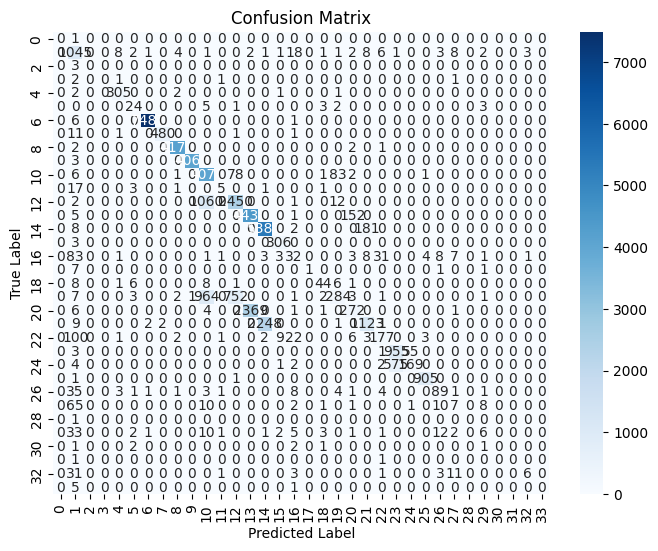

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)  # Train the model

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess dataset
df = dfs[1]  # Replace with your actual dataset path
X = df.drop(columns=['label'])  # Replace 'target' with your actual target column name
y = df['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define dimensions
input_dim = X_train.shape[1]  # Number of features in the input data
latent_dim = 10  # Latent space dimension, adjust based on the desired feature reduction

# Encoder Network
inputs = layers.Input(shape=(input_dim,))
h = layers.Dense(64, activation='relu')(inputs)
h = layers.Dense(32, activation='relu')(h)
z_mean = layers.Dense(latent_dim, name='z_mean')(h)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(h)

# Sampling Layer
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Decoder Network
decoder_h = layers.Dense(32, activation='relu')
decoder_mean = layers.Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE Model
vae = models.Model(inputs, x_decoded_mean)

# Loss Function
def vae_loss(inputs, x_decoded_mean):
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.mse(inputs, x_decoded_mean))
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return reconstruction_loss + kl_loss

vae.compile(optimizer='adam', loss=vae_loss)

# Train the VAE
vae.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Extract the encoder model
encoder = models.Model(inputs, z_mean)

# Encode the entire training and testing sets at once
print("Extracting features using encoder:")
X_train_encoded = encoder.predict(X_train, verbose=1)  # Batch prediction for training data
X_test_encoded = encoder.predict(X_test, verbose=1)    # Batch prediction for testing data

# Train a simple classifier on the encoded features
clf = LogisticRegression(random_state=42)
clf.fit(X_train_encoded, y_train)

# Predict and evaluate the classifier
y_pred = clf.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with VAE-extracted features: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/10


ValueError: Tried to convert 'x' to a tensor and failed. Error: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


### Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [6]:
for train_set in tqdm(training_sets):
    scaler.fit(pd.read_csv(DATASET_DIRECTORY + train_set)[X_columns])

### Classification: 34 (33+1) classes

In [7]:
ML_models = [
        LogisticRegression(n_jobs=-1),
]

ML_neams = [
        "LogisticRegression",
]

for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

In [8]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred
        

In [9]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_neams[k]} (34 classes) #####")
    print('accuracy_score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

# Classification: 8 (7+1) classes

In [10]:
dict_7classes = {}
dict_7classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_7classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_7classes['DDoS-SYN_Flood'] = 'DDoS'
dict_7classes['DDoS-UDP_Flood'] = 'DDoS'
dict_7classes['DDoS-TCP_Flood'] = 'DDoS'
dict_7classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_7classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_7classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-SlowLoris'] = 'DDoS'
dict_7classes['DDoS-HTTP_Flood'] = 'DDoS'

dict_7classes['DoS-UDP_Flood'] = 'DoS'
dict_7classes['DoS-SYN_Flood'] = 'DoS'
dict_7classes['DoS-TCP_Flood'] = 'DoS'
dict_7classes['DoS-HTTP_Flood'] = 'DoS'


dict_7classes['Mirai-greeth_flood'] = 'Mirai'
dict_7classes['Mirai-greip_flood'] = 'Mirai'
dict_7classes['Mirai-udpplain'] = 'Mirai'

dict_7classes['Recon-PingSweep'] = 'Recon'
dict_7classes['Recon-OSScan'] = 'Recon'
dict_7classes['Recon-PortScan'] = 'Recon'
dict_7classes['VulnerabilityScan'] = 'Recon'
dict_7classes['Recon-HostDiscovery'] = 'Recon'

dict_7classes['DNS_Spoofing'] = 'Spoofing'
dict_7classes['MITM-ArpSpoofing'] = 'Spoofing'

dict_7classes['BenignTraffic'] = 'Benign'

dict_7classes['BrowserHijacking'] = 'Web'
dict_7classes['Backdoor_Malware'] = 'Web'
dict_7classes['XSS'] = 'Web'
dict_7classes['Uploading_Attack'] = 'Web'
dict_7classes['SqlInjection'] = 'Web'
dict_7classes['CommandInjection'] = 'Web'


dict_7classes['DictionaryBruteForce'] = 'BruteForce'

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


ML_models = [
        LogisticRegression(n_jobs=-1),
]

ML_neams = [
        "LogisticRegression",
]


for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    new_y = [dict_7classes[k] for k in d[y_column]]
    d[y_column] = new_y
    
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

In [12]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    new_y = [dict_7classes[k] for k in d_test[y_column]]
    d_test[y_column] = new_y
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred
        

In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_neams[k]} (8 classes) #####")
    print('accuracy_score = ', accuracy_score(y_pred, y_test))
    print('recall_score = ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score = ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score = ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

# Classification: 2 (1+1) Classes

In [14]:
dict_2classes = {}
dict_2classes['DDoS-RSTFINFlood'] = 'Attack'
dict_2classes['DDoS-PSHACK_Flood'] = 'Attack'
dict_2classes['DDoS-SYN_Flood'] = 'Attack'
dict_2classes['DDoS-UDP_Flood'] = 'Attack'
dict_2classes['DDoS-TCP_Flood'] = 'Attack'
dict_2classes['DDoS-ICMP_Flood'] = 'Attack'
dict_2classes['DDoS-SynonymousIP_Flood'] = 'Attack'
dict_2classes['DDoS-ACK_Fragmentation'] = 'Attack'
dict_2classes['DDoS-UDP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-ICMP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-SlowLoris'] = 'Attack'
dict_2classes['DDoS-HTTP_Flood'] = 'Attack'

dict_2classes['DoS-UDP_Flood'] = 'Attack'
dict_2classes['DoS-SYN_Flood'] = 'Attack'
dict_2classes['DoS-TCP_Flood'] = 'Attack'
dict_2classes['DoS-HTTP_Flood'] = 'Attack'


dict_2classes['Mirai-greeth_flood'] = 'Attack'
dict_2classes['Mirai-greip_flood'] = 'Attack'
dict_2classes['Mirai-udpplain'] = 'Attack'

dict_2classes['Recon-PingSweep'] = 'Attack'
dict_2classes['Recon-OSScan'] = 'Attack'
dict_2classes['Recon-PortScan'] = 'Attack'
dict_2classes['VulnerabilityScan'] = 'Attack'
dict_2classes['Recon-HostDiscovery'] = 'Attack'

dict_2classes['DNS_Spoofing'] = 'Attack'
dict_2classes['MITM-ArpSpoofing'] = 'Attack'

dict_2classes['BenignTraffic'] = 'Benign'

dict_2classes['BrowserHijacking'] = 'Attack'
dict_2classes['Backdoor_Malware'] = 'Attack'
dict_2classes['XSS'] = 'Attack'
dict_2classes['Uploading_Attack'] = 'Attack'
dict_2classes['SqlInjection'] = 'Attack'
dict_2classes['CommandInjection'] = 'Attack'

dict_2classes['DictionaryBruteForce'] = 'Attack'

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


ML_models = [
        LogisticRegression(n_jobs=-1),
]

ML_neams = [
        "LogisticRegression",
]


for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    new_y = [dict_2classes[k] for k in d[y_column]]
    d[y_column] = new_y
    
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

In [16]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    new_y = [dict_2classes[k] for k in d_test[y_column]]
    d_test[y_column] = new_y
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred
        

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_neams[k]} (2 classes) #####")
    print('accuracy_score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()